# Data Preparation and EDA for IoT23 dataset

In [1]:
import os 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict
import csv
from numpy import array
from numpy import argmax
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
data= pd.read_csv('D:\\JupyterNotebook\\GitHub\\IoT-BotNet-detection-on-IoT23-dataset\\IoT23\\Data files\\iot23_combined_1M.csv', low_memory=False)

In [3]:
data.head()  

,Unnamed: 0,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,0,1.536227e+09,CeqqKl3hyLQmO8LK98,192.168.100.111,17576.0,78.1.220.212,8081.0,tcp,-,3e-06,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,POHS
1,1,1.536227e+09,C2oHQWo1EFGH8D9x7,192.168.100.111,17576.0,152.84.7.111,8081.0,tcp,-,2e-06,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,POHS
2,2,1.536227e+09,CJLVjs4BByG04mczXc,192.168.100.111,17576.0,173.36.41.67,8081.0,tcp,-,2e-06,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,POHS
3,3,1.536227e+09,C0z4uS9AWHDH2s4S7,192.168.100.111,17576.0,87.13.21.104,8081.0,tcp,-,2e-06,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,POHS
4,4,1.536227e+09,CxbNVk3liFNUIlqSPi,192.168.100.111,17576.0,99.110.163.140,8081.0,tcp,-,2e-06,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,POHS


In [4]:
del data['Unnamed: 0']

# Cleaning Process start! 

In [5]:
data.head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,1.536227e+09,CeqqKl3hyLQmO8LK98,192.168.100.111,17576.0,78.1.220.212,8081.0,tcp,-,3e-06,0,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,POHS
1,1.536227e+09,C2oHQWo1EFGH8D9x7,192.168.100.111,17576.0,152.84.7.111,8081.0,tcp,-,2e-06,0,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,POHS
2,1.536227e+09,CJLVjs4BByG04mczXc,192.168.100.111,17576.0,173.36.41.67,8081.0,tcp,-,2e-06,0,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,POHS
3,1.536227e+09,C0z4uS9AWHDH2s4S7,192.168.100.111,17576.0,87.13.21.104,8081.0,tcp,-,2e-06,0,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,POHS
4,1.536227e+09,CxbNVk3liFNUIlqSPi,192.168.100.111,17576.0,99.110.163.140,8081.0,tcp,-,2e-06,0,...,S0,-,-,0.0,S,2.0,80.0,0.0,0.0,POHS


In [6]:
data.tail()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,conn_state,local_orig,local_resp,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
1244671,1.532526e+09,CMeH6R2aua5c5Dd65a,192.168.100.111,41762.0,221.182.209.127,23.0,tcp,-,-,-,...,S0,-,-,0.0,S,1.0,40.0,0.0,0.0,POHS
1244672,1.532526e+09,CvqGx33hsXDpDVXa1i,192.168.100.111,58758.0,208.50.139.48,23.0,tcp,-,-,-,...,S0,-,-,0.0,S,1.0,40.0,0.0,0.0,POHS
1244673,1.532526e+09,CC83RoUd9RLFuTL81,192.168.100.111,40400.0,40.95.136.51,23.0,tcp,-,-,-,...,S0,-,-,0.0,S,1.0,40.0,0.0,0.0,POHS
1244674,1.532526e+09,C4ISld2cuSukEEuQtk,192.168.100.111,27117.0,122.37.183.236,23.0,tcp,-,-,-,...,S0,-,-,0.0,S,1.0,40.0,0.0,0.0,POHS
1244675,1.532526e+09,C4U1azYmDx32faVY7,192.168.100.111,23227.0,189.62.234.179,23.0,tcp,-,-,-,...,S0,-,-,0.0,S,1.0,40.0,0.0,0.0,POHS


In [7]:
data.replace('-','0',inplace=True)

# dropping unncessary attributes ! 

In [8]:
df= data.drop(columns=['service','ts','uid','id.orig_h','id.orig_p','id.resp_h','id.resp_p','local_orig','local_resp'])

In [9]:
df.head()

,proto,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label
0,tcp,3e-06,0,0,S0,0.0,S,2.0,80.0,0.0,0.0,POHS
1,tcp,2e-06,0,0,S0,0.0,S,2.0,80.0,0.0,0.0,POHS
2,tcp,2e-06,0,0,S0,0.0,S,2.0,80.0,0.0,0.0,POHS
3,tcp,2e-06,0,0,S0,0.0,S,2.0,80.0,0.0,0.0,POHS
4,tcp,2e-06,0,0,S0,0.0,S,2.0,80.0,0.0,0.0,POHS


In [10]:
df.replace('-','0',inplace=True)

Let us separate the target and independent variables 

okkkk... so there are 7 target variables with very few samples.. we would like to remove all those 

In [11]:
df.drop(df[df['label'] == 'C&C-HeartBeat' ].index, inplace = True)

In [12]:
df.drop(df[df['label'] == 'Attack' ].index, inplace = True)

In [13]:
df.drop(df[df['label'] == 'C&C-FileDownload' ].index, inplace = True)

In [14]:
df.drop(df[df['label'] == 'C&C-Mirai' ].index, inplace = True)

In [15]:
df.drop(df[df['label'] == 'C&C-HeartBeat-FileDownload' ].index, inplace = True)

In [16]:
df.drop(df[df['label'] == 'FileDownload' ].index, inplace = True)

In [17]:
df.drop(df[df['label'] == 'C&C-Torii' ].index, inplace = True)

Checking if there any null values in the dataset

In [18]:
df.shape

(1244131, 12)

Separating dependent and independent variables

In [19]:
X= df.iloc[:,:-1]

In [20]:
Y=df['label']

In [21]:
X.shape

(1244131, 11)

In [22]:
Y.unique()

array(['POHS', 'Okiru', 'DDoS', 'Benign', 'C&C'], dtype=object)

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244131 entries, 0 to 1244675
Data columns (total 11 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   proto          1244131 non-null  object 
 1   duration       1244131 non-null  object 
 2   orig_bytes     1244131 non-null  object 
 3   resp_bytes     1244131 non-null  object 
 4   conn_state     1244131 non-null  object 
 5   missed_bytes   1244131 non-null  float64
 6   history        1244131 non-null  object 
 7   orig_pkts      1244131 non-null  float64
 8   orig_ip_bytes  1244131 non-null  float64
 9   resp_pkts      1244131 non-null  float64
 10  resp_ip_bytes  1244131 non-null  float64
dtypes: float64(5), object(6)
memory usage: 113.9+ MB


In [24]:
X['orig_bytes']=X['orig_bytes'].astype(float)

In [25]:
X['duration']=X['duration'].astype(float)

In [26]:
X['resp_bytes']=X['resp_bytes'].astype(float)

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244131 entries, 0 to 1244675
Data columns (total 11 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   proto          1244131 non-null  object 
 1   duration       1244131 non-null  float64
 2   orig_bytes     1244131 non-null  float64
 3   resp_bytes     1244131 non-null  float64
 4   conn_state     1244131 non-null  object 
 5   missed_bytes   1244131 non-null  float64
 6   history        1244131 non-null  object 
 7   orig_pkts      1244131 non-null  float64
 8   orig_ip_bytes  1244131 non-null  float64
 9   resp_pkts      1244131 non-null  float64
 10  resp_ip_bytes  1244131 non-null  float64
dtypes: float64(8), object(3)
memory usage: 113.9+ MB


In [28]:
Yn=Y.value_counts()

In [29]:
Yarray=np.array(Yn)

In [30]:
Yarray

array([677827, 262690, 149744, 138777,  15093], dtype=int64)

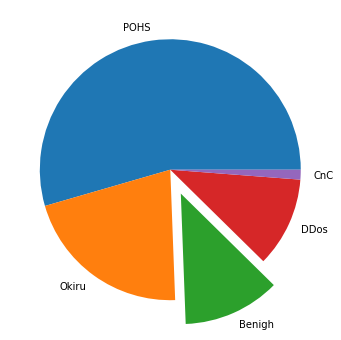

In [31]:
y =Yarray
mylabels = ["POHS", "Okiru", "Benigh", "DDos","CnC"]
myexplode = [0,0,0.2,0,0]
plt.figure(figsize=(6,6))
plt.pie(y, labels = mylabels, explode=myexplode)
plt.show() 

In [32]:
cat_df =X.select_dtypes(include=['object']).copy()

In [33]:
cat_df.head()

,proto,conn_state,history
0,tcp,S0,S
1,tcp,S0,S
2,tcp,S0,S
3,tcp,S0,S
4,tcp,S0,S


In [34]:
num_df =X.select_dtypes(exclude=['object']).copy()

In [35]:
encode_all_cat =cat_df.apply(LabelEncoder().fit_transform)

In [36]:
encode_all_cat.head()

,proto,conn_state,history
0,1,5,16
1,1,5,16
2,1,5,16
3,1,5,16
4,1,5,16


In [37]:
encoded_data =pd.concat([num_df,encode_all_cat], axis=1)

In [38]:
encoded_data.head()

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,proto,conn_state,history
0,0.000003,0.0,0.0,0.0,2.0,80.0,0.0,0.0,1,5,16
1,0.000002,0.0,0.0,0.0,2.0,80.0,0.0,0.0,1,5,16
2,0.000002,0.0,0.0,0.0,2.0,80.0,0.0,0.0,1,5,16
3,0.000002,0.0,0.0,0.0,2.0,80.0,0.0,0.0,1,5,16
4,0.000002,0.0,0.0,0.0,2.0,80.0,0.0,0.0,1,5,16


In [39]:
encoded_data.shape

(1244131, 11)

# checking the skewness in data 

In [40]:
Xs=encoded_data

MemoryError: Unable to allocate 341. GiB for an array with shape (45800985595,) and data type float64

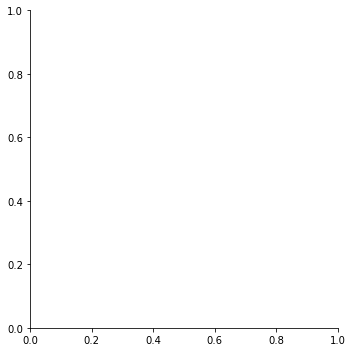

In [41]:
sns.displot(Xs)

In [97]:
skw=skew(Xs)
print(skw)

[ 6.99354184e+02  8.02048163e+02  1.11170616e+03  3.20622581e+02
  6.10222774e+02  4.77632491e+02  1.06402378e+03  1.11158762e+03
  8.49932363e+00 -2.35395833e+00  6.65247832e-02]


In [98]:
sns.hist(alpha=0.5, bins=15, grid=True, legend=None)  # Pandas helper function to plot a hist. Uses matplotlib under the hood.
plt.xlabel("Feature value")
plt.title("Histogram")
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [72]:
X_t=encoded_data

In [73]:
X_t.shape

(1244131, 11)

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaling=StandardScaler()

In [76]:
X_t=scaling.fit_transform(X_t)

In [77]:
X_t

array([[-0.00788124, -0.00171163, -0.0011739 , ..., -0.10748127,
         0.28123379,  0.27726592],
       [-0.00788126, -0.00171163, -0.0011739 , ..., -0.10748127,
         0.28123379,  0.27726592],
       [-0.00788126, -0.00171163, -0.0011739 , ..., -0.10748127,
         0.28123379,  0.27726592],
       ...,
       [-0.00788129, -0.00171163, -0.0011739 , ..., -0.10748127,
         0.28123379,  0.27726592],
       [-0.00788129, -0.00171163, -0.0011739 , ..., -0.10748127,
         0.28123379,  0.27726592],
       [-0.00788129, -0.00171163, -0.0011739 , ..., -0.10748127,
         0.28123379,  0.27726592]])

# Feature Coorelation 

In [155]:
Xt = pd.DataFrame(X_t)

In [156]:
corr = encoded_data.corr()

<AxesSubplot:>

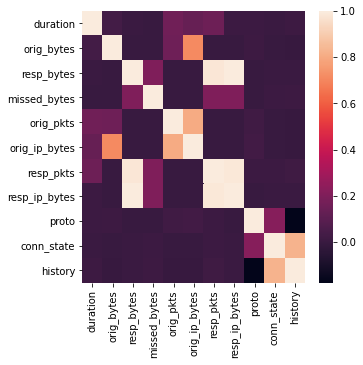

In [157]:
import seaborn as sns
#Using Pearson Correlation
corrmat = encoded_data.corr()
fig, ax = plt.subplots()
fig.set_size_inches(5,5)
sns.heatmap(corrmat)

In [158]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = encoded_data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [159]:
corr_features = correlation(encoded_data, 0.8)
len(set(corr_features))

4

In [80]:
le=LabelEncoder()

In [81]:
Ym=le.fit_transform(Y)

In [82]:
Ym


array([4, 4, 4, ..., 4, 4, 4])

In [171]:
corr_features

{'history', 'orig_ip_bytes', 'resp_ip_bytes', 'resp_pkts'}

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import neighbors
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
import time as timer

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X_t, Ym, random_state=124, test_size=0.40)

In [176]:
from imblearn.over_sampling import SMOTE 

In [177]:
from collections import Counter

In [178]:
counter = Counter(Y_train)

In [179]:
print('before balancing',counter)

before balancing Counter({4: 406762, 3: 157447, 0: 89912, 2: 83234, 1: 9123})


In [180]:
smt=SMOTE()

In [181]:
SMOTE?

In [182]:
X_train_sm, y_train_sm = smt.fit_resample(X_train, X_train)

ValueError: Unknown label type: 'continuous-multioutput'

In [ ]:
sns.displot(X_train)

In [88]:
from scipy.stats import norm, kurtosis

In [91]:
kurt=kurtosis(X_train)

In [92]:
kurt

array([3.97007047e+05, 5.06932459e+05, 1.97047218e+05, 1.56751329e+05,
       3.87402701e+05, 2.47668583e+05, 2.99506083e+05, 1.79556868e+05,
       7.59584434e+01, 5.52623435e+00, 2.10459313e+01])

In [85]:
from scipy.stats import skew

In [93]:
skw=skew(X_train)
print(skw)

[ 6.04309332e+02  6.86042079e+02  4.05011613e+02  3.71883192e+02
  5.70050440e+02  4.63066125e+02  4.83885289e+02  3.81004506e+02
  8.48065298e+00 -2.35090359e+00  8.37645237e-02]
